In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as sp

N = 200

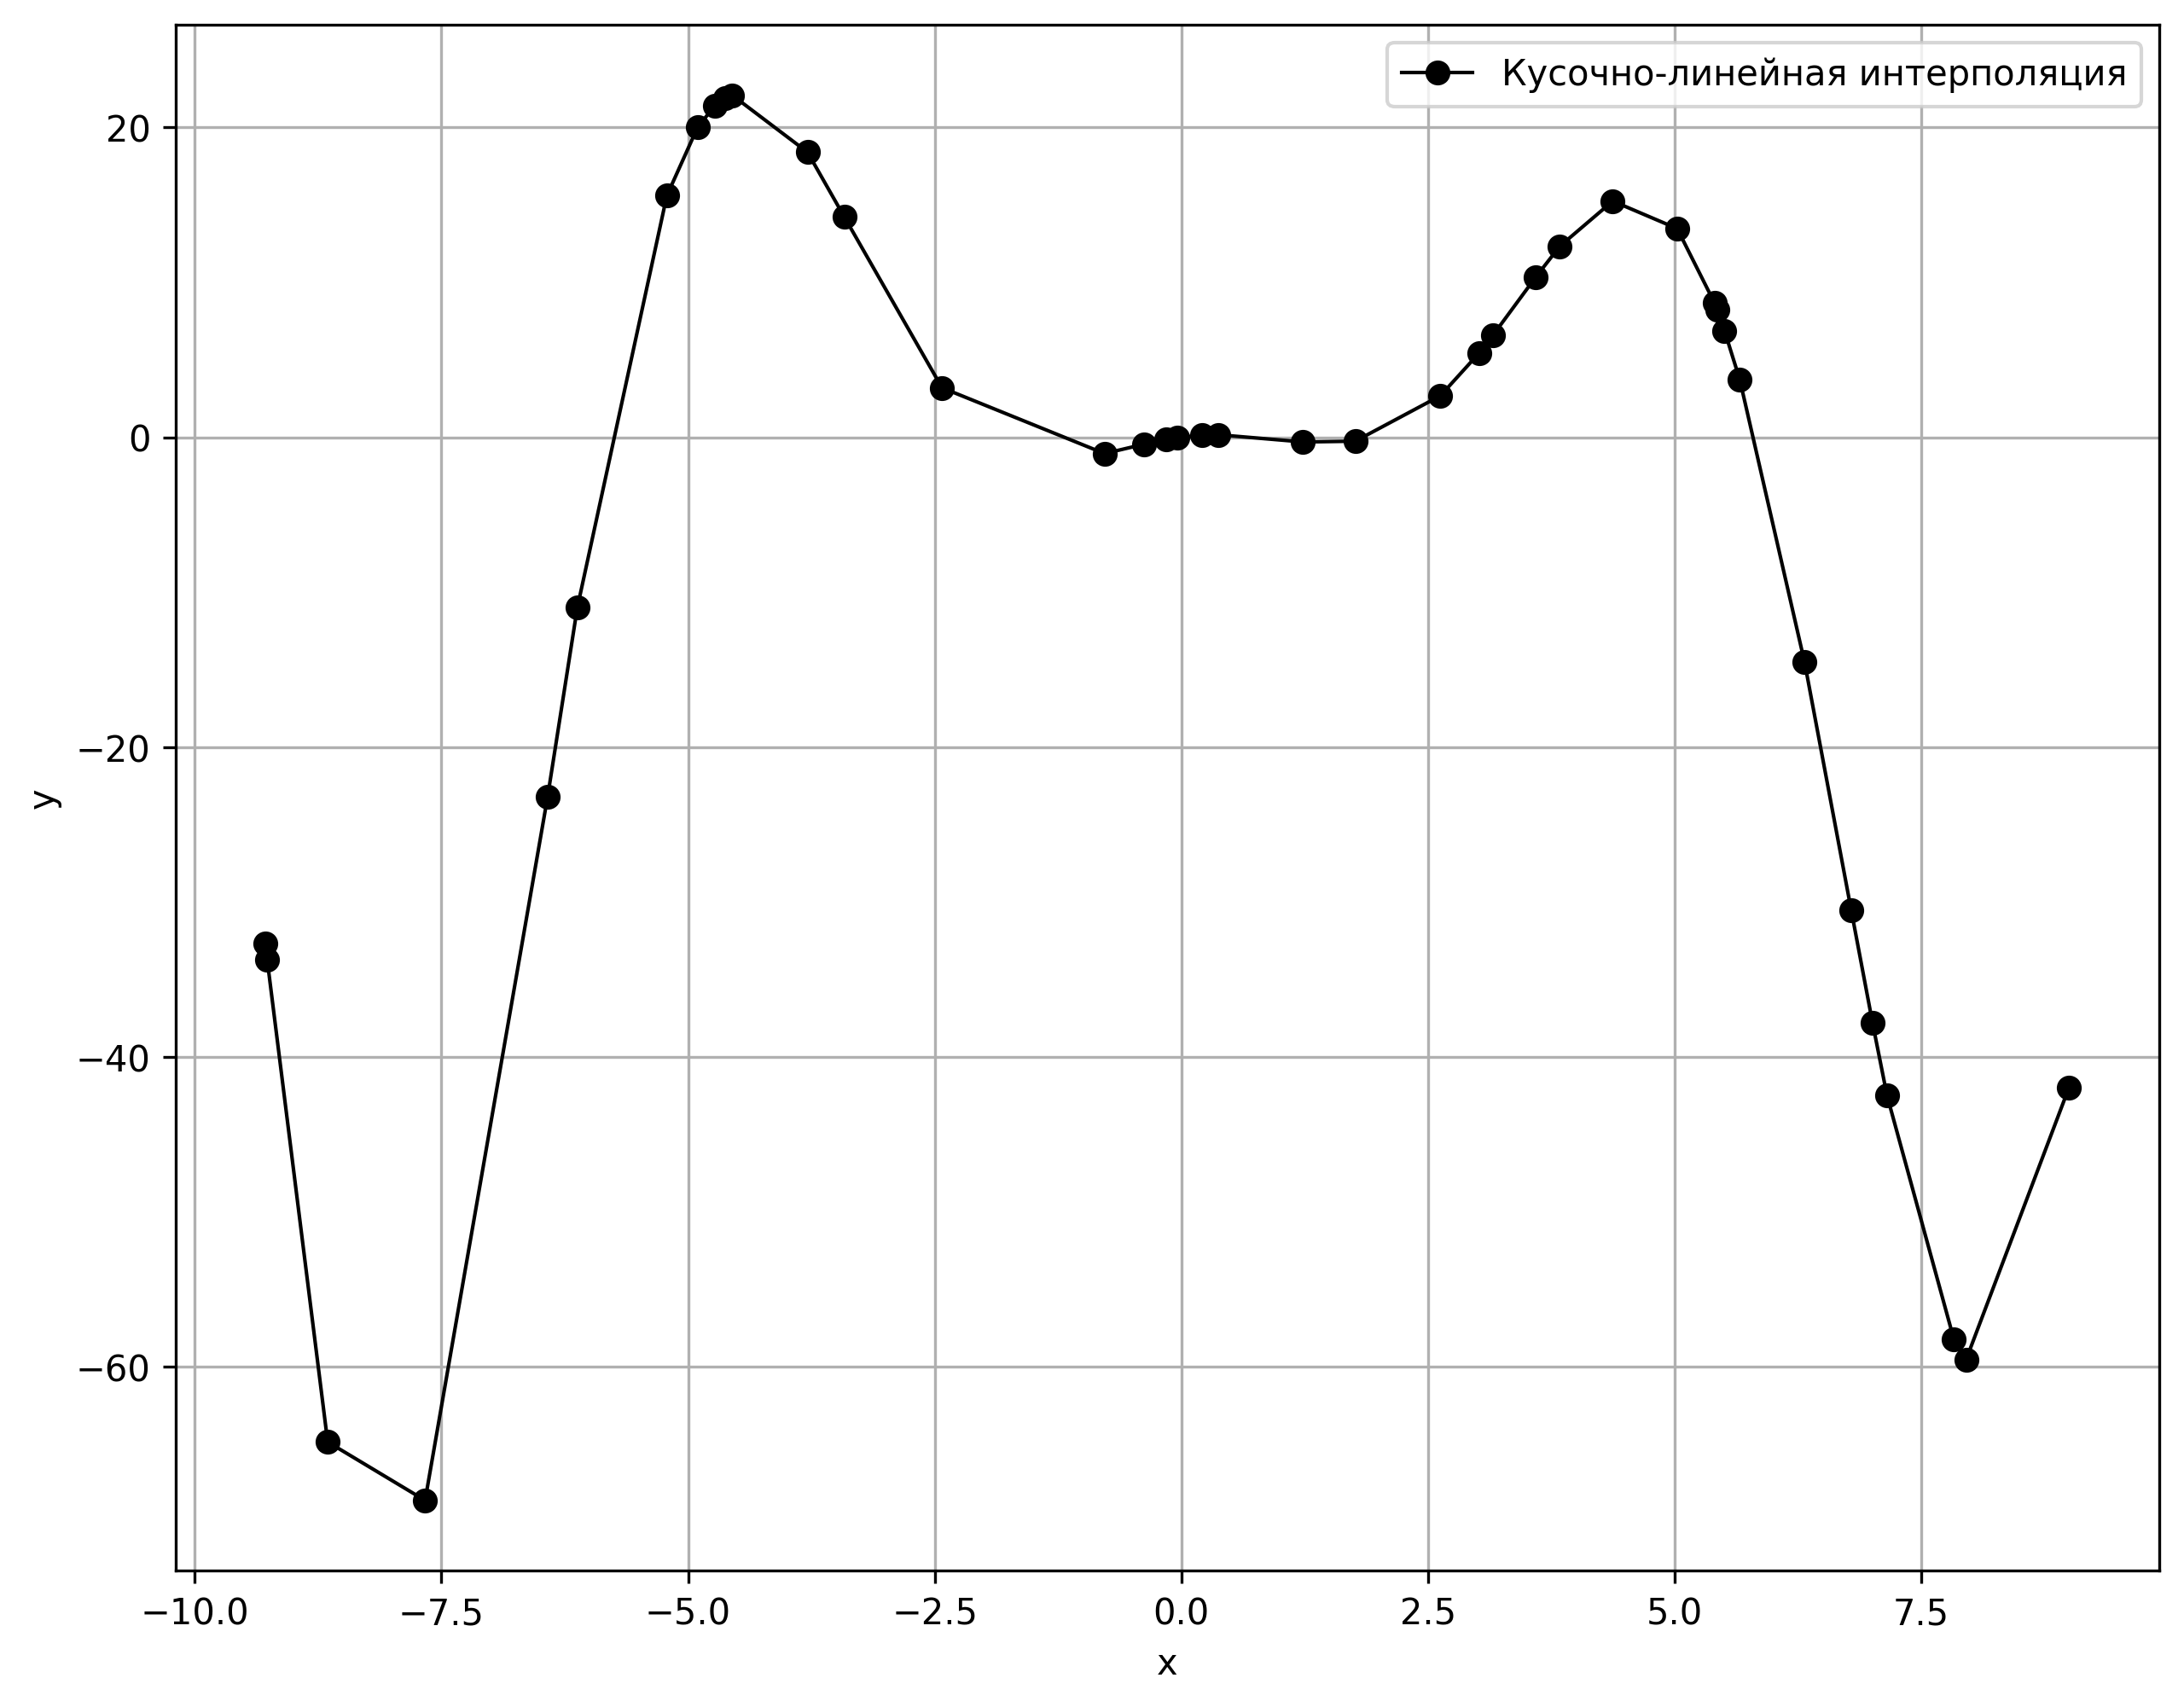

In [2]:
def f(x, a, b, c, d):
    return((a - b*x - c*x**2) * np.cos(d*x))
   
points = pd.read_csv('lab1.csv', header=None, sep=' ').sort_values(0)
x = points[0]
y = points[1]
    
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), dpi=300)
axes.plot(x, y, '-o', color="#000000", linewidth=1.0, label="Кусочно-линейная интерполяция")
axes.legend(loc=0)
axes.grid()
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.show()

In [9]:
sol = sp.curve_fit(f, x, y)
a = sol[0][0]
b = sol[0][1]
c = sol[0][2]
d = sol[0][3]
print('Optimal solution: \na = {}\nb = {}\nc = {}\nd = {}\n'.format(a, b, c, d))

Optimal solution: 
a = 1.6942604050207115e-08
b = -0.8500000004660923
c = 1.0600000005314958
d = 0.8100000000087411



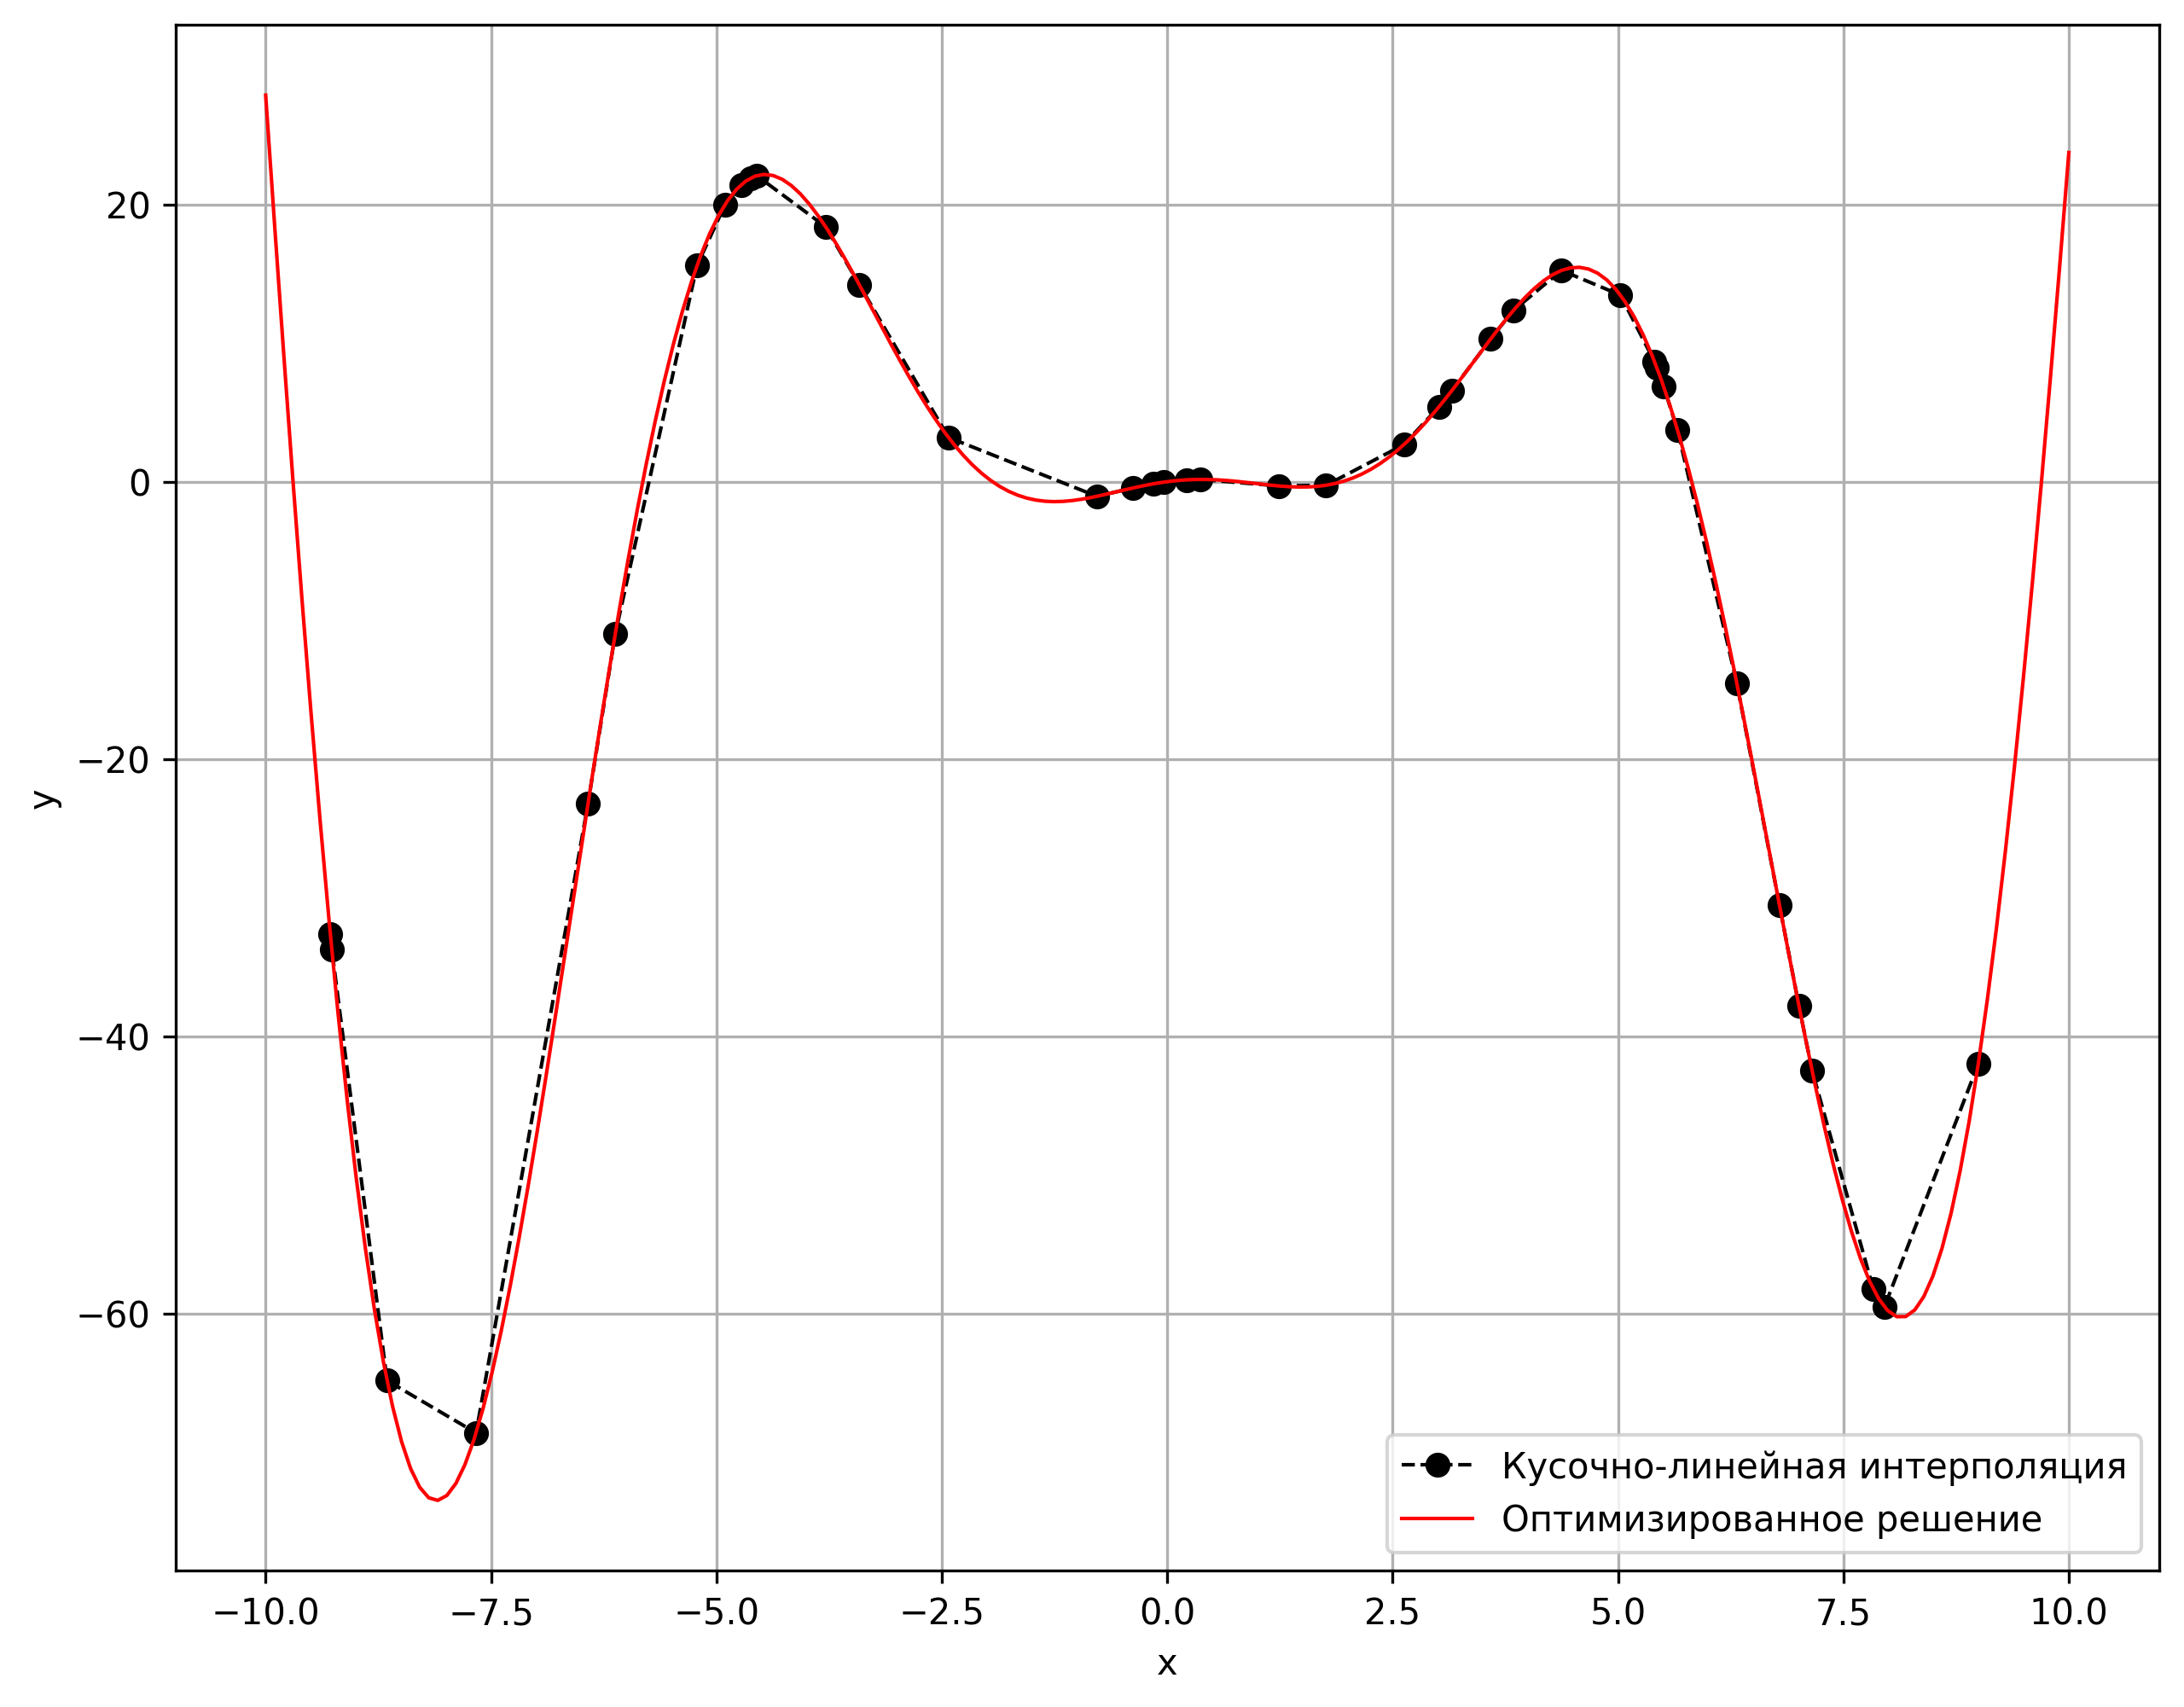

In [4]:
x_opt = np.linspace(-10, 10, N)
y_opt = []
for i in x_opt:
    y_opt.append(f(i, a, b, c, d))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), dpi=300)
axes.plot(x, y, '--o', color="#000000", linewidth=1.0, label="Кусочно-линейная интерполяция")
axes.plot(x_opt, y_opt, '-', color="#FF0000", linewidth=1.0, label="Оптимизированное решение")
axes.legend(loc=0)
axes.grid()
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.show()

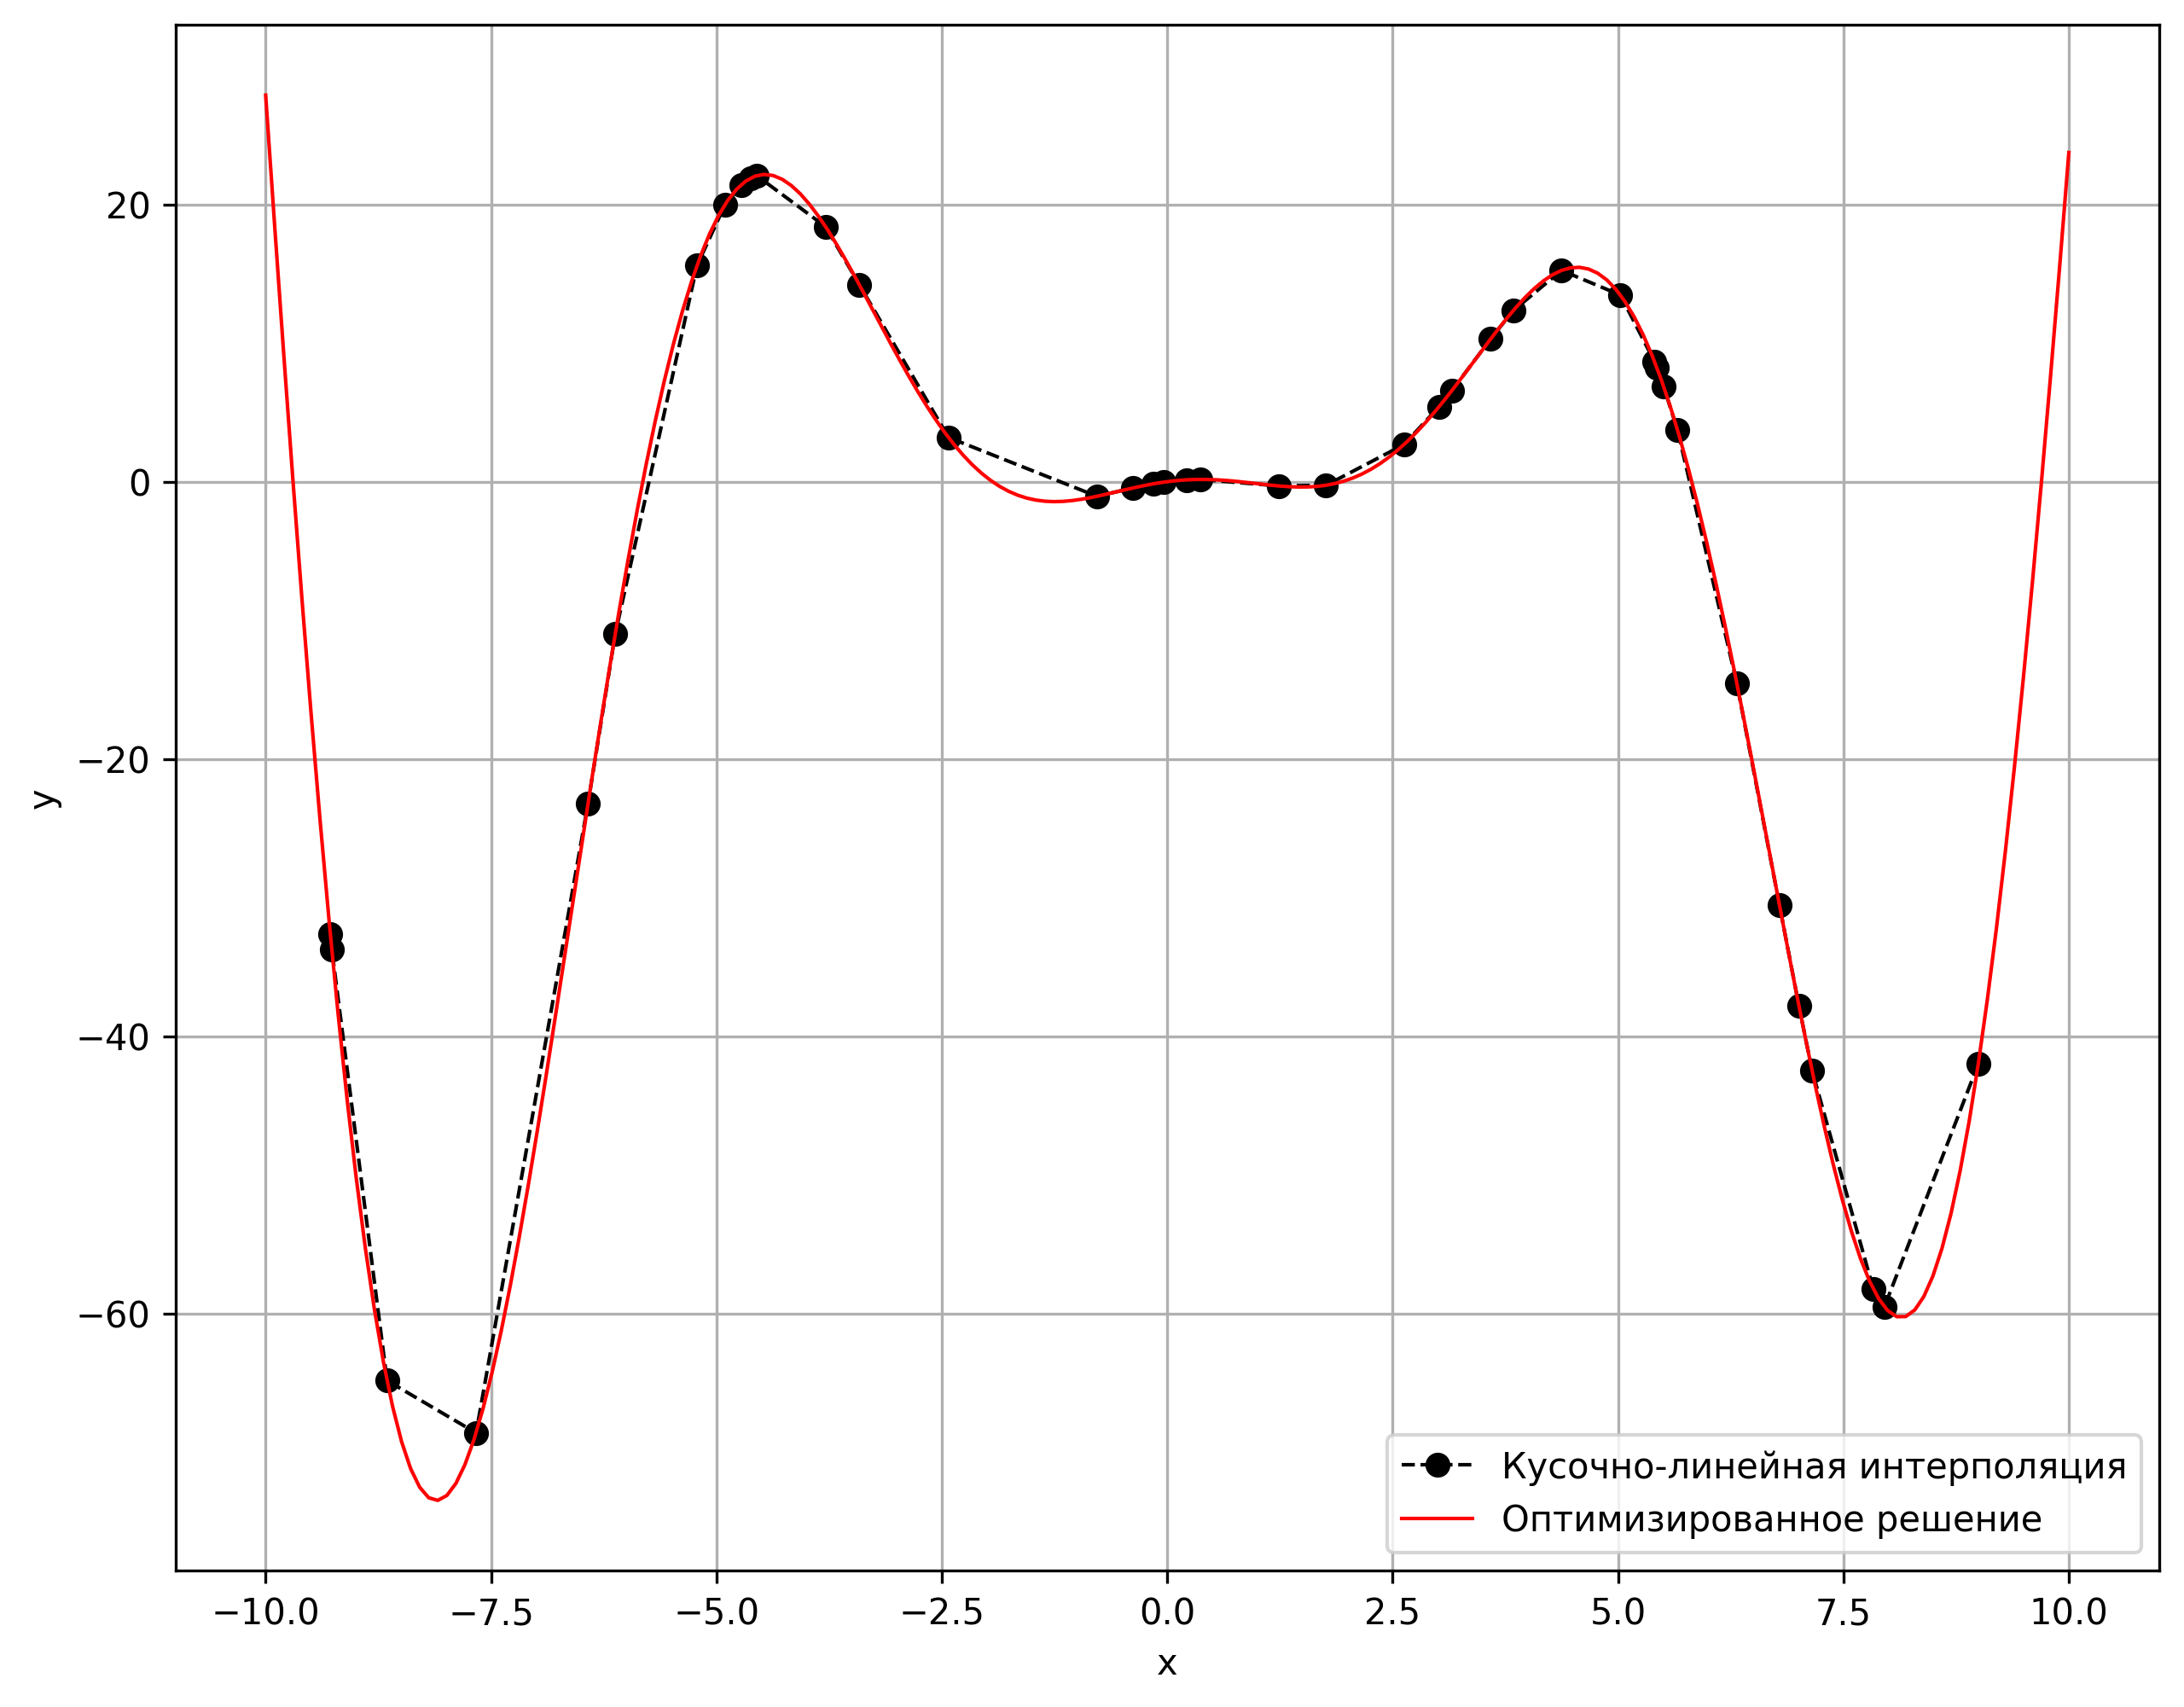

In [5]:
# Так как коэффициент 'a' пренебрежимо мал, от него можно избавиться с целью упрощения функции.
def f_2(x, b, c, d):
    return((-b*x - c*x**2) * np.cos(d*x))

y_opt = []
for i in x_opt:
    y_opt.append(f_2(i, b, c, d))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), dpi=300)
axes.plot(x, y, '--o', color="#000000", linewidth=1.0, label="Кусочно-линейная интерполяция")
axes.plot(x_opt, y_opt, '-', color="#FF0000", linewidth=1.0, label="Оптимизированное решение")
axes.legend(loc=0)
axes.grid()
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.show()

In [6]:
devs = []
standard_dev = 0
for i in range(len(x)):
    devs.append(abs(y[i] - f_2(x[i], b, c, d)))
    standard_dev += np.sqrt((y[i] - f_2(x[i], b, c, d))**2)
    
max_dev = max(devs)
standard_dev /= len(x)

print('Maximum deviation = {}\nStandard deviation = {}'.format(max_dev, standard_dev))

Maximum deviation = 3.5053702163168055e-08
Standard deviation = 8.830372293447408e-09
